# Una función en PostgreSQL

```SQL
CREATE OR REPLACE FUNCTION evaluar_existencia(nombre_tabla TEXT) RETURNS
LANGUAGE plpgsql
AS $$
DECLARE

BEGIN

RETURN ;
END ;
$$;
```

Para invocar la función:

```SQL
SELECT * FROM tabla_cultivos;
```

- CREATE OR REPLACE FUNCTION(): En esta linea de código se define la función y los parametros que recibe la función, en caso de recibirlos.
- RETURNS: En esta linea se definen los valores de salida de la función.
- LANGUAGE plpgsql: Se establece el lenguage que va a utilizar, en este caso es el lenguaje de consultas plpgsql, pero hay otros 2 lenguages mas, `internal y c`.
- AS $$: Aqui se inicia en contenido de la función
- DECLARE: En esta sección del código se declaran las variables que se usarán dentro de la función.
- BEGIN: Aquí se inicia las instrucciones de la función.
- RETURN tipo_dato;: Aquí se establece los valores de salida.
- END; Finaliza las instrucciones de la función
- `$$`; Finaliza el contenido de la función.



# Dada una tabla

```sql
CREATE TABLE IF NOT EXISTS tabla_cultivos(
    codigo SERIAL PRIMARY KEY,
    cultivo VARCHAR(10)
);
```



# Ejemplo de funciones

```sql
CREATE OR REPLACE FUNCTION evaluar_existencia(nombre_tabla TEXT)
RETURNS TABLE(mensaje TEXT, existe_tabla BOOLEAN)
LANGUAGE plpgsql
AS $$ --Inicia la funcion
DECLARE
    presente BOOL;
    no_presente VARCHAR(15);
BEGIN
    IF EXISTS (SELECT tablename FROM pg_tables WHERE tablename = nombre_tabla)
        THEN
            mensaje := 'Existe la tabla';
            existe_tabla := True;
        ELSE
            mensaje := 'NO existe la tabla';
            existe_tabla := False;
    END IF;
RETURN QUERY SELECT mensaje, existe_tabla;
END;
$$;
```

Para invocar la funcion:

```sql
SELECT evaluar_existencia('tabla_cultivos');
```

- RETURNS TABLE(variable TIPO):  Se define como variable de salida a una tabla.
- RETURN QUERY SELECT column1, column2; Aquí la función retorna el contenido en las columnas de la consulta hecha y definida previamente.

# OUT

```sql
-- Funcion con OUT
CREATE OR REPLACE FUNCTION obtener_datos_cliente_out(cliente_id INTEGER, OUT nombre_cliente VARCHAR, OUT total_pedidos INTEGER) RETURNS RECORD LANGUAGE PLPGSWL as $$
BEGIN
-- contenido de la funcion
END;
$$

-- Función sin OUT
CREATE OR REPLACE FUNCTION obtener_datos_clientes(cliente_id INTEGER) RETURNS TABLE (nombre_cliente VARCHAR, total_peidos INTEGER) LANGUAGE plpgsql AS $$
BEGIN 
-- contenido de la funcion
END; 
$$;

```

## Consultas dinámicas.

```sql
sql_query := FORMAT('UPDATE tabla_cultivos SET %I = 100 * RANDOM()', CONCAT('2024-', mes, '-25'));
EXECUTE sql_query;

sql_query := FORMAT('ALTER TABLE tabla_cultivos ADD COLUMN IF NOT EXISTS %I INTEGER DEFAULT 1;', fecha);
EXECUTE sql_query;
```

### Instrucciones estáticas:

- `__column__`: Para poder realizar consultas dinámicas es necesario usar la siguiente sintaxis: `variable := FORMAT(__%i__, column1); EXECUTE variable`



```sql
SELECT generar_filas()
CREATE OR REPLACE FUNCTION crear_columnas() RETURNS TEXT LANGUAGE plpgsql AS $$
DECLARE
    contador INTEGER;
    fecha DATE;
    sql_query TEXT;
BEGIN
    FOR contador IN 1..12 LOOP
        fecha : to_char(current_date  ((contador - 1) *interval '1 month'), 'YYYY_MM_DD');
        sql_query := format('ALTER TABLE cultivos ADD COLUMN IF NOT EXISTS %I INTEGER DEFAULT 1;', fecha);

        EXECUTE sql_query;
    END LOOP;
    RETURN 'tabla llena'
END;
$$;
```
- RETURNS TABLE(variable1 TIPO, variable2 TIPO): Se define como variable de salida a una tabla
- DECLARE: No se usó
- RETURN QUERY SELECT column1, column2; Aquí la función retorna el contenido en las columnas de la consulta hecha y definida previamente.

```sql
CREATE OR REPLACE FUNCTION generar_datos()
RETURNS TEXT LANGUAGE plpgsql AS $$
DECLARE
    contador INTEGER;
    mes TEXT;
    sql_query TEXT;
BEGIN
    FOR contador IN 1..12 LOOP
        IF contador <7
            THEN
                mes := to_char(contador+6, 'FM00');
                sql_query := FORMAT('UPDATE tabla_cultivos SET %I = 100 * RANDOM()', CONCAT('2024-', mes, '-25'));
                EXECUTE sql_query;
            ELSE
                mes := to_char(contador-6, 'FM00');
                sql_query := FORMAT('UPDATE tabla_cultivos SET %I = 100 * RANDOM()', CONCAT('2025-', mes, '-25'));
                EXECUTE sql_query;
        END IF;
    END LOOP;
RETURN 'datos generados';
END;
$$;
```

`mes := to_char(contador-6, 'FM00');`
- `:=` Se usa para asignar valores.
- `to_char()` Convierte un calor en cadena.
- `'FM00'`
  - `FM` Retira espacios vacios.
  - `00` Establece la cantidad mínima de valores, ej: 1->01.

# Normalizar

Proceso de simplificación de los datos.
- Tener almacenado con el menor espacio posible.
- Eliminar datos repetidos.
- Eliminar errores lógicos.
- ordenar datos.

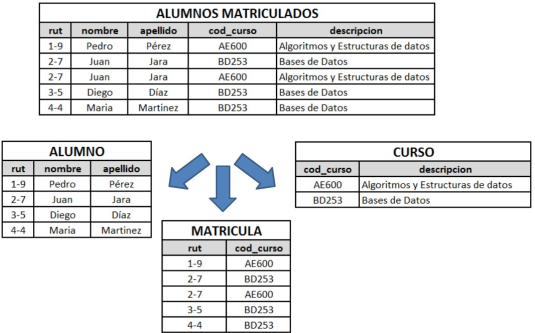

# Restricciones 'CHECK'

Con esta palabra reservada se restringe el contenido presente en un dato, en una columna.

```sql
CREATE TABLE IF NOT EXISTS pruebas (
    codigo CHAR(3) PRIMARY KEY,
    CHECK (codigo SIMILIAR TO 'C[0-9]{2}'),
    contexto VARCHAR(15)
);

INSERT INTO pruebas (codigo, contexto) VALUES ('C01', 'primero');

SELECT * FROM pruebas;
```

## LIKE vs SIMILIAR TO

En SQL, las cláusulas `LIKE` y `SIMILAR TO` se utilizan para realizar búsquedas de patrones en cadenas de texto, pero tienen diferencias en cuanto a su funcionamiento y sintaxis.

### `LIKE`
- **Función:** `LIKE` se utiliza para buscar un patrón específico en una cadena de texto.
- **Sintaxis:** Utiliza dos comodines principales:
  - `%` representa cualquier secuencia de caracteres (incluyendo ninguna).
  - `_` representa un solo carácter.
  
  **Ejemplos:**
  ```sql
  SELECT * FROM usuarios WHERE nombre LIKE 'A%'; -- Encuentra nombres que comienzan con 'A'
  SELECT * FROM usuarios WHERE nombre LIKE '_a%'; -- Encuentra nombres donde el segundo carácter es 'a'
  ```

- **Limitaciones:** Solo permite patrones básicos, lo que lo hace menos flexible que `SIMILAR TO`.

### `SIMILAR TO`
- **Función:** `SIMILAR TO` es una versión más avanzada que permite usar expresiones regulares para la coincidencia de patrones.
- **Sintaxis:** Combina las características de `LIKE` con las de las expresiones regulares. Los comodines son similares, pero el lenguaje de patrones es más potente:
  - `%` es equivalente a `.*` en expresiones regulares, es decir, cualquier secuencia de caracteres.
  - `_` es equivalente a `.` en expresiones regulares, es decir, un solo carácter.
  
  **Ejemplo:**
  ```sql
  SELECT * FROM usuarios WHERE nombre SIMILAR TO 'A(_|%)Z'; -- Encuentra nombres que empiezan con 'A' y terminan con 'Z'
  ```

- **Ventajas:** Al usar expresiones regulares, `SIMILAR TO` permite patrones más complejos que `LIKE`.

### Resumen
- **`LIKE`**: Sencillo, para patrones básicos con `%` y `_`.
- **`SIMILAR TO`**: Más flexible, permite expresiones regulares complejas.

**Nota**: `SIMILAR TO` no es soportado por todos los sistemas de bases de datos SQL, mientras que `LIKE` es ampliamente soportado.

# DEBUG

Mensajes informativos:
```sql
BEGIN
    RAISE NOTICE 'Mensaje informativo';
RETURN;
```
Mensajes de error:
```sql
BEGIN
    RAISE EXCEPTION 'Mensaje de Error';
RETURN;
```

# INDEX

En PostgreSQL, un **índice (INDEX)** es una estructura de datos que mejora la velocidad de las operaciones de consulta en una tabla. Los índices permiten a la base de datos encontrar rápidamente las filas correspondientes a una consulta sin tener que escanear toda la tabla. Sin embargo, los índices también pueden aumentar el tiempo de inserción, actualización y eliminación de datos, ya que estos deben actualizarse cada vez que se modifican los datos indexados.

### Tipos de Índices en PostgreSQL
PostgreSQL admite varios tipos de índices, incluyendo:

1. **B-tree (por defecto)**: Es el tipo más común y eficiente para la mayoría de las consultas. Es adecuado para consultas de igualdad y rango (`<`, `>`, `=`, `<=`, `>=`, `BETWEEN`).
2. **Hash**: Útil para consultas de igualdad (`=`), pero no para operaciones de rango.
3. **GIN (Generalized Inverted Index)**: Ideal para tipos de datos compuestos, como arrays o búsquedas de texto completo.
4. **GiST (Generalized Search Tree)**: Adecuado para datos geoespaciales, texto completo, y otros tipos de datos que no se ajustan bien a los índices B-tree.
5. **SP-GiST**: Útil para estructuras de datos escasamente pobladas o de árboles.
6. **BRIN (Block Range INdexes)**: Eficiente para grandes tablas en las que los datos tienen algún orden natural.

### Creación de un Índice

Para crear un índice en PostgreSQL, se usa el comando `CREATE INDEX`. A continuación se muestra la sintaxis básica y algunos ejemplos.

#### Sintaxis Básica
```sql
CREATE INDEX nombre_del_indice
ON nombre_de_la_tabla (columna1 [opciones], columna2 [opciones], ...);
```

- **`nombre_del_indice`**: Es el nombre del índice. Si no se especifica, PostgreSQL asignará un nombre automáticamente.
- **`nombre_de_la_tabla`**: Es el nombre de la tabla en la que se creará el índice.
- **`columna1`, `columna2`, ...**: Son las columnas que se incluirán en el índice. Pueden incluirse varias columnas.

#### Ejemplo: Crear un Índice B-tree (por defecto)
```sql
CREATE INDEX idx_usuario_nombre
ON usuarios (nombre);
```
Este comando crea un índice llamado `idx_usuario_nombre` en la columna `nombre` de la tabla `usuarios`. Este índice acelerará las consultas que buscan por el campo `nombre`.

#### Ejemplo: Crear un Índice en Múltiples Columnas
```sql
CREATE INDEX idx_usuario_nombre_email
ON usuarios (nombre, email);
```
Este índice se crea sobre las columnas `nombre` y `email` de la tabla `usuarios`. Es útil cuando las consultas filtran por ambas columnas.

#### Ejemplo: Crear un Índice Único
```sql
CREATE UNIQUE INDEX idx_usuario_email_unico
ON usuarios (email);
```
Este índice asegura que no habrá valores duplicados en la columna `email` de la tabla `usuarios`.

#### Ejemplo: Crear un Índice GIN para Búsqueda de Texto Completo
```sql
CREATE INDEX idx_documento_contenido_gin
ON documentos USING GIN (to_tsvector('spanish', contenido));
```
Este índice se usa para acelerar búsquedas de texto completo en la columna `contenido` de la tabla `documentos`.

### Consideraciones al Usar Índices
- **Rendimiento**: Los índices mejoran el rendimiento de las consultas de lectura, pero pueden ralentizar las operaciones de escritura.
- **Espacio en Disco**: Los índices ocupan espacio adicional en disco.
- **Mantenimiento**: Los índices deben ser mantenidos y actualizados cuando los datos de las tablas cambian.

Es importante crear índices en columnas que se usan frecuentemente en cláusulas `WHERE`, `JOIN`, `ORDER BY`, y `GROUP BY` para mejorar el rendimiento de las consultas.

# VIEW

En PostgreSQL, una **vista (VIEW)** es una consulta almacenada que se presenta como una tabla virtual. Una vista no contiene datos por sí misma, sino que es una representación de una consulta que se ejecuta cada vez que se accede a la vista. Las vistas pueden simplificar consultas complejas, mejorar la seguridad ocultando ciertas columnas o filas, y hacer que el esquema de la base de datos sea más comprensible.

### Características de una Vista

1. **Consulta Almacenada**: Una vista es básicamente una consulta SQL almacenada que se puede reutilizar.
2. **Virtual**: No almacena datos físicamente, sino que se genera dinámicamente cada vez que se accede a la vista.
3. **Simplificación**: Permite simplificar consultas complejas, reutilizando lógica SQL.
4. **Seguridad**: Puede restringir el acceso a ciertas columnas o filas, mostrando solo la información relevante.
5. **Actualizable**: En algunos casos, las vistas pueden ser actualizables, lo que significa que se pueden realizar operaciones `INSERT`, `UPDATE`, o `DELETE` sobre ellas y se reflejarán en las tablas base, aunque hay limitaciones.

### Creación de una Vista

Para crear una vista en PostgreSQL, se utiliza el comando `CREATE VIEW`. La sintaxis básica es la siguiente:

#### Sintaxis Básica
```sql
CREATE VIEW nombre_de_la_vista AS
SELECT columna1, columna2, ...
FROM nombre_de_la_tabla
WHERE condiciones;
```

- **`nombre_de_la_vista`**: Es el nombre de la vista.
- **`SELECT`**: La consulta que define la vista. Puede ser una consulta compleja que involucre múltiples tablas, uniones, agregaciones, etc.

#### Ejemplo: Crear una Vista Simple
```sql
CREATE VIEW vista_usuarios_activos AS
SELECT id, nombre, email
FROM usuarios
WHERE activo = true;
```
Esta vista, llamada `vista_usuarios_activos`, muestra solo los usuarios que están activos (`activo = true`) y muestra solo las columnas `id`, `nombre` y `email`.

#### Ejemplo: Vista con Join
```sql
CREATE VIEW vista_ordenes_clientes AS
SELECT o.id AS orden_id, c.nombre AS cliente_nombre, o.fecha
FROM ordenes o
JOIN clientes c ON o.cliente_id = c.id;
```
Esta vista une las tablas `ordenes` y `clientes` para mostrar el ID de la orden, el nombre del cliente y la fecha de la orden.

### Uso de una Vista

Una vez creada, puedes utilizar una vista como si fuera una tabla. Por ejemplo:

```sql
SELECT * FROM vista_usuarios_activos WHERE nombre LIKE 'J%';
```

### Actualización de Vistas
Algunas vistas en PostgreSQL son actualizables, lo que significa que puedes hacer operaciones `INSERT`, `UPDATE`, o `DELETE` sobre ellas, y esos cambios se reflejarán en las tablas subyacentes. Sin embargo, no todas las vistas son actualizables, especialmente si contienen uniones, agregaciones o funciones no deterministas.

### Modificación de una Vista

Si necesitas modificar una vista, puedes utilizar el comando `CREATE OR REPLACE VIEW`:

```sql
CREATE OR REPLACE VIEW vista_usuarios_activos AS
SELECT id, nombre, email, fecha_registro
FROM usuarios
WHERE activo = true;
```

### Eliminación de una Vista

Para eliminar una vista, se utiliza el comando `DROP VIEW`:

```sql
DROP VIEW vista_usuarios_activos;
```

### Consideraciones al Usar Vistas
- **Rendimiento**: Aunque las vistas simplifican la gestión de consultas complejas, pueden tener un impacto en el rendimiento si no se usan correctamente, ya que la consulta subyacente se ejecuta cada vez que se accede a la vista.
- **Actualización**: No todas las vistas son actualizables, lo que puede limitar su uso en ciertas situaciones.
- **Seguridad**: Pueden utilizarse para limitar el acceso a ciertos datos, pero no deben reemplazar los mecanismos de seguridad como permisos y roles.

Las vistas son una herramienta poderosa en PostgreSQL para simplificar el acceso a los datos y mejorar la claridad y seguridad de la base de datos.

# TRIGGER

Un **trigger** (disparador) en PostgreSQL es un tipo de mecanismo que ejecuta automáticamente una función específica en respuesta a ciertos eventos en una tabla o vista. Estos eventos pueden ser operaciones de inserción (`INSERT`), actualización (`UPDATE`), o eliminación (`DELETE`). Los triggers son útiles para automatizar tareas como la validación de datos, el registro de auditorías, la sincronización de tablas, o la implementación de restricciones complejas.

### Características de un Trigger

1. **Automatización**: Ejecuta una función automáticamente cuando ocurre un evento especificado.
2. **Eventos**: Puede dispararse antes o después de operaciones de `INSERT`, `UPDATE`, o `DELETE`.
3. **Función Asociada**: El trigger siempre se asocia a una función que define lo que se debe hacer cuando el trigger se activa.
4. **Condicionales**: Puede incluir condiciones para que el trigger solo se active bajo ciertas circunstancias.
5. **Mutabilidad**: Los triggers pueden modificar los datos en la fila afectada antes de que se finalice la operación (si se usa un trigger "BEFORE").

### Creación de un Trigger

Crear un trigger en PostgreSQL implica dos pasos principales:
1. **Crear una función**: Definir una función que contenga la lógica que se ejecutará cuando se dispare el trigger.
2. **Crear el trigger**: Asociar la función con un evento en una tabla o vista.

#### Paso 1: Crear la Función
La función que se asocia a un trigger debe tener un tipo de retorno especial llamado `TRIGGER`. Aquí hay un ejemplo básico:

```sql
CREATE OR REPLACE FUNCTION auditar_inserciones()
RETURNS TRIGGER AS $$
BEGIN
    INSERT INTO auditoria(tabla, operacion, usuario, fecha)
    VALUES (TG_TABLE_NAME, TG_OP, CURRENT_USER, NOW());
    RETURN NEW;
END;
$$ LANGUAGE plpgsql;
```

En este ejemplo, la función `auditar_inserciones` inserta un registro en una tabla de auditoría cada vez que se dispara, registrando el nombre de la tabla, la operación, el usuario y la fecha.

#### Paso 2: Crear el Trigger
Una vez que la función está definida, puedes crear el trigger que la asocie a una tabla y un evento específicos:

```sql
CREATE TRIGGER trigger_auditoria_inserciones
AFTER INSERT ON usuarios
FOR EACH ROW
EXECUTE FUNCTION auditar_inserciones();
```

Este trigger se dispara **después de** cada operación `INSERT` en la tabla `usuarios`, y ejecuta la función `auditar_inserciones`.

### Tipos de Triggers

1. **BEFORE Trigger**: Se ejecuta antes de que se realice la operación. Útil para validar o modificar datos antes de que se inserten o actualicen en la tabla.
   ```sql
   CREATE TRIGGER trigger_nombre
   BEFORE INSERT OR UPDATE ON tabla
   FOR EACH ROW
   EXECUTE FUNCTION funcion_trigger();
   ```

2. **AFTER Trigger**: Se ejecuta después de que la operación se haya completado. Ideal para tareas como la auditoría, la sincronización, o el envío de notificaciones.
   ```sql
   CREATE TRIGGER trigger_nombre
   AFTER DELETE ON tabla
   FOR EACH ROW
   EXECUTE FUNCTION funcion_trigger();
   ```

3. **INSTEAD OF Trigger**: Se utiliza principalmente con vistas para ejecutar una función en lugar de realizar la operación que normalmente ocurriría.
   ```sql
   CREATE TRIGGER trigger_nombre
   INSTEAD OF INSERT ON vista
   FOR EACH ROW
   EXECUTE FUNCTION funcion_trigger();
   ```

### Ejemplo Completo: Crear un Trigger para Auditoría de Actualizaciones

Supongamos que queremos registrar en una tabla de auditoría cada vez que se actualiza el email de un usuario.

#### Crear la Tabla de Auditoría
```sql
CREATE TABLE auditoria (
    id SERIAL PRIMARY KEY,
    tabla TEXT,
    operacion TEXT,
    usuario TEXT,
    fecha TIMESTAMP,
    valor_anterior TEXT,
    valor_nuevo TEXT
);
```

#### Crear la Función para el Trigger
```sql
CREATE OR REPLACE FUNCTION auditar_actualizaciones()
RETURNS TRIGGER AS $$
BEGIN
    IF OLD.email IS DISTINCT FROM NEW.email THEN
        INSERT INTO auditoria(tabla, operacion, usuario, fecha, valor_anterior, valor_nuevo)
        VALUES (TG_TABLE_NAME, TG_OP, CURRENT_USER, NOW(), OLD.email, NEW.email);
    END IF;
    RETURN NEW;
END;
$$ LANGUAGE plpgsql;
```

#### Crear el Trigger
```sql
CREATE TRIGGER trigger_auditoria_actualizaciones
AFTER UPDATE ON usuarios
FOR EACH ROW
EXECUTE FUNCTION auditar_actualizaciones();
```

### Consideraciones al Usar Triggers

1. **Rendimiento**: Los triggers pueden afectar el rendimiento si contienen lógica compleja o si se aplican a tablas con gran volumen de operaciones.
2. **Debugging**: Puede ser difícil depurar problemas con triggers porque se ejecutan automáticamente y no son visibles en las consultas.
3. **Recursión**: Un trigger puede activar otro trigger, lo que puede llevar a una recursión infinita si no se controla adecuadamente.

### Eliminación de un Trigger

Si necesitas eliminar un trigger, puedes usar el comando `DROP TRIGGER`:

```sql
DROP TRIGGER trigger_auditoria_actualizaciones ON usuarios;
```

Los triggers son herramientas poderosas para automatizar y garantizar la consistencia en las operaciones de una base de datos, pero deben ser utilizados con cuidado para evitar impactos negativos en el rendimiento o la complejidad del sistema.

# RECORD

En PostgreSQL, un **`RECORD`** es un tipo de dato que representa una fila genérica o un conjunto de columnas sin un esquema fijo. Se utiliza en funciones almacenadas para manejar filas de datos cuando no se conoce de antemano la estructura exacta de la fila (es decir, cuando el número, los nombres o los tipos de las columnas no están definidos explícitamente).

### Características de `RECORD`

1. **Genérico**: A diferencia de un tipo `ROWTYPE`, que está asociado con una tabla específica, un `RECORD` no tiene una estructura fija hasta que se asigna una fila a él.
2. **Flexible**: Se puede usar en situaciones donde se espera recibir filas de diferentes tablas o consultas con columnas variables.
3. **Acceso a Columnas**: Una vez que un `RECORD` tiene datos, se accede a sus columnas usando la notación de punto (`.`), pero solo después de que se le asignen valores.

### Uso de `RECORD` en Funciones

`RECORD` se utiliza principalmente dentro de funciones almacenadas (procedimientos) y bloques anónimos de PL/pgSQL. No se declara fuera de un contexto de función o procedimiento.

#### Ejemplo Básico: Usar `RECORD` en una Función

Supongamos que tienes una tabla `usuarios` con columnas `id`, `nombre`, y `email`. Puedes usar un `RECORD` para iterar sobre los resultados de una consulta sin conocer exactamente los nombres o tipos de las columnas:

```sql
CREATE OR REPLACE FUNCTION procesar_usuarios()
RETURNS VOID AS $$
DECLARE
    rec RECORD;
BEGIN
    FOR rec IN SELECT * FROM usuarios LOOP
        -- Aquí se puede trabajar con cada fila obtenida
        RAISE NOTICE 'Usuario: % - Email: %', rec.nombre, rec.email;
    END LOOP;
END;
$$ LANGUAGE plpgsql;
```

En este ejemplo:

- **`rec RECORD`**: Se declara una variable `rec` de tipo `RECORD` para almacenar filas de datos.
- **`FOR rec IN SELECT * FROM usuarios LOOP`**: Se itera sobre todas las filas de la tabla `usuarios`, y cada fila se almacena en `rec`.
- **Acceso a columnas**: Una vez que `rec` contiene una fila, puedes acceder a sus columnas usando `rec.nombre` y `rec.email`.

### Asignación Explícita a un `RECORD`

Además de usar `RECORD` en un bucle, también puedes asignar explícitamente el resultado de una consulta a un `RECORD`:

```sql
CREATE OR REPLACE FUNCTION obtener_usuario(id_usuario INT)
RETURNS VOID AS $$
DECLARE
    rec RECORD;
BEGIN
    SELECT * INTO rec FROM usuarios WHERE id = id_usuario;
    
    IF rec IS NOT NULL THEN
        RAISE NOTICE 'Usuario encontrado: % - Email: %', rec.nombre, rec.email;
    ELSE
        RAISE NOTICE 'No se encontró ningún usuario con ID %', id_usuario;
    END IF;
END;
$$ LANGUAGE plpgsql;
```

### Consideraciones al Usar `RECORD`

1. **No Tipado**: `RECORD` es flexible pero no tiene un esquema fijo. Esto significa que si accedes a columnas que no existen en los datos actuales, PostgreSQL lanzará un error.
2. **Performance**: Aunque `RECORD` es poderoso para manejar casos genéricos, puede no ser tan eficiente como usar tipos definidos explícitamente (`ROWTYPE`) cuando se conoce el esquema.

### Diferencia con `ROWTYPE`

- **`RECORD`**: Es completamente genérico y no tiene una estructura fija.
- **`ROWTYPE`**: Está asociado a una tabla o vista específica y toma su estructura de ella. Por ejemplo, `mi_tabla%ROWTYPE` tiene las mismas columnas que `mi_tabla`.

### Resumen

- **`RECORD`** es un tipo de dato genérico para almacenar filas con una estructura desconocida o variable.
- Se usa comúnmente en funciones almacenadas para manejar filas de consultas dinámicas o datos de diferentes fuentes.
- Aunque es flexible, su uso debe ser cuidadoso, especialmente cuando se trata de acceder a columnas específicas.

El tipo `RECORD` es esencial para escribir funciones almacenadas versátiles que puedan trabajar con diferentes tipos de datos sin estar acopladas a un esquema fijo.